# Data Analytics in Finance

## Estrategias de Trading

In [ ]:
import pandas as pd  # Importamos pandas
import numpy as np 
import matplotlib as mpl  # Importando matplotlib 
import matplotlib.pyplot as plt  
plt.style.use('seaborn') 
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [23]:
finance_info = pd.read_csv('tr_eikon_eod_data.csv')

In [24]:
finance_info.head()

,Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
0,2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
1,2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2,2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
3,2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
4,2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [25]:
apple = 'AAPL.O'

In [27]:
data = (pd.DataFrame(finance_info[apple]).dropna())

In [28]:
Moving_Average_42 = 42  
Moving_Average_252 = 252  

In [30]:
data['Moving_Average_42'] = data[symbol].rolling(Moving_Average_42).mean()  
data['Moving_Average_252'] = data[symbol].rolling(Moving_Average_252).mean() 

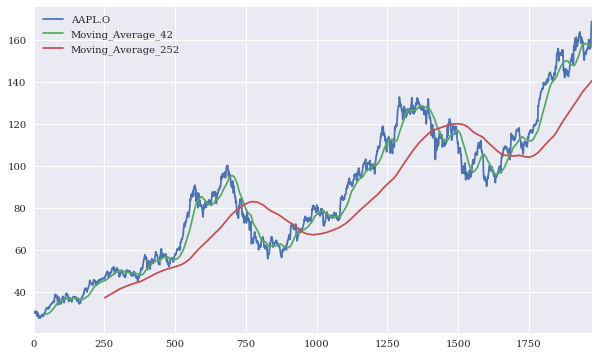

In [31]:
data.plot(figsize=(10, 6));

In [32]:
data.dropna(inplace=True)

In [33]:
data['Position'] = np.where(data['Moving_Average_42'] > data['Moving_Average_252'], 1, -1) 

In [34]:
data.head(10)

,AAPL.O,Moving_Average_42,Moving_Average_252,Position
251,46.079954,45.280967,37.120735,1
252,47.081381,45.349708,37.186246,1
253,47.327096,45.412599,37.252521,1
254,47.714238,45.466102,37.322266,1
255,47.675667,45.522565,37.392079,1
256,48.017095,45.582089,37.462453,1
257,48.922094,45.671800,37.537478,1
258,48.805665,45.752106,37.613397,1
259,49.202808,45.846544,37.689230,1
260,49.382808,45.974605,37.766469,1


In [35]:
data.tail(10)

,AAPL.O,Moving_Average_42,Moving_Average_252,Position
1962,159.76,157.948810,139.087798,1
1963,155.98,157.919524,139.242004,1
1964,156.25,157.835476,139.397520,1
1965,156.17,157.744762,139.554544,1
1966,157.10,157.693095,139.711091,1
1967,156.41,157.610952,139.862520,1
1968,157.41,157.514286,140.028472,1
1969,163.05,157.517619,140.221210,1
1970,166.72,157.597857,140.431528,1
1971,169.04,157.717857,140.651766,1


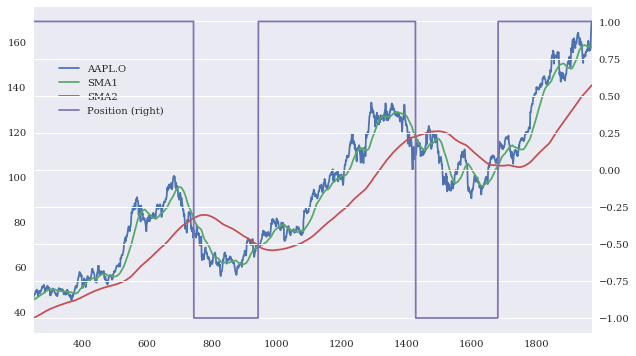

In [13]:
ax = data.plot(secondary_y='Position', figsize=(10, 6))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

## Backtesting: ¿Qué es el Backtesting?

In [38]:
data['Returns'] = np.log(data[symbol] / data[symbol].shift(1)) 

In [39]:
data['Strategy'] = data['Position'].shift(1) * data['Returns']

In [42]:
data.round(4).head(10)

,AAPL.O,Moving_Average_42,Moving_Average_252,Position,Returns,Strategy
251,46.0800,45.2810,37.1207,1,NaN,NaN
252,47.0814,45.3497,37.1862,1,0.0215,0.0215
253,47.3271,45.4126,37.2525,1,0.0052,0.0052
254,47.7142,45.4661,37.3223,1,0.0081,0.0081
255,47.6757,45.5226,37.3921,1,-0.0008,-0.0008
256,48.0171,45.5821,37.4625,1,0.0071,0.0071
257,48.9221,45.6718,37.5375,1,0.0187,0.0187
258,48.8057,45.7521,37.6134,1,-0.0024,-0.0024
259,49.2028,45.8465,37.6892,1,0.0081,0.0081
260,49.3828,45.9746,37.7665,1,0.0037,0.0037


In [17]:
data.dropna(inplace=True)

In [18]:
np.exp(data[['Returns', 'Strategy']].sum())

Returns     3.668406
Strategy    5.306802
dtype: float64

In [19]:
data[['Returns', 'Strategy']].std() * 252 ** 0.5

Returns     0.252947
Strategy    0.252763
dtype: float64

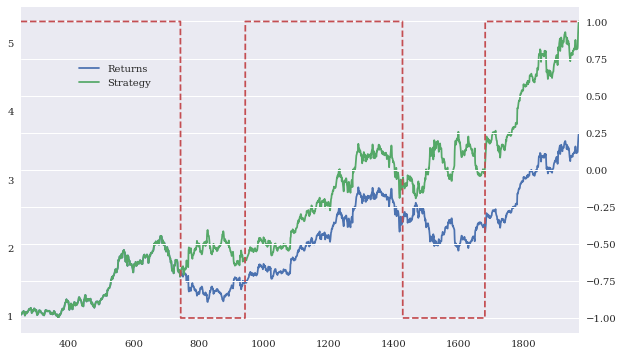

In [20]:
ax = data[['Returns', 'Strategy']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

## ¿Cuál es la mejor estrategia?

In [44]:
from itertools import product

In [45]:
Short_Moving_Average = range(20, 61, 4)  
Long_Moving_Average = range(180, 281, 10)

In [53]:
results = pd.DataFrame()
for SHORT_MA, LONG_MA in product(Short_Moving_Average, Long_Moving_Average):  
    data = pd.DataFrame(finance_info[apple])
    data.dropna(inplace=True)
    data['Returns'] = np.log(data[apple] / data[apple].shift(1))
    data['SHORT_MA'] = data[symbol].rolling(SHORT_MA).mean()
    data['LONG_MA'] = data[symbol].rolling(LONG_MA).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SHORT_MA'] > data['LONG_MA'], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    results = results.append(pd.DataFrame(
                {'SHORT_MA': SHORT_MA, 'LONG_MA': LONG_MA,
                 'MARKET': perf['Returns'],
                 'STRATEGY': perf['Strategy'],
                 'OUT': perf['Strategy'] - perf['Returns']},
                 index=[0]), ignore_index=True)  

In [54]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
SHORT_MA    121 non-null int64
LONG_MA     121 non-null int64
MARKET      121 non-null float64
STRATEGY    121 non-null float64
OUT         121 non-null float64
dtypes: float64(3), int64(2)
memory usage: 4.9 KB


In [56]:
results.sort_values('OUT', ascending=False).head(10)

,SHORT_MA,LONG_MA,MARKET,STRATEGY,OUT
56,40,190,4.246631,6.552273,2.305642
39,32,240,3.694406,5.989309,2.294903
59,40,220,3.853897,5.976137,2.122240
46,36,200,3.721010,5.834923,2.113913
55,40,180,4.177810,6.262625,2.084815
70,44,220,3.853897,5.908175,2.054279
101,56,200,3.721010,5.770906,2.049896
34,32,190,4.246631,6.197938,1.951307
45,36,190,4.246631,6.149341,1.902710
91,52,210,3.890069,5.785482,1.895413
